# Inception, BatchNorm, Callbacks, SeparableConv


1. Load the Dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

from keras.applications.inception_v3 import InceptionV3
import cv2


In [3]:
# graph function
def graph():
    plt.figure(figsize = (12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], 'b-', label = 'loss')
    plt.plot(history.history['val_loss'], 'y--', label = 'val_loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
    plt.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylim([0.7, 1])
    plt.legend()

    return plt.show()

In [4]:
#load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#normalization
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

4422102/4422102 [==============================] - 0s 0us/step


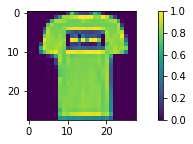

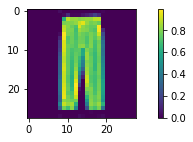

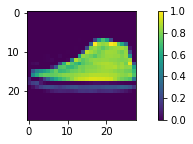

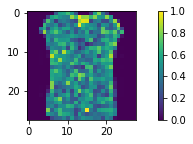

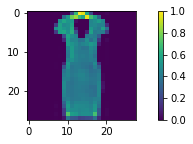

In [5]:
#visualization
for i in range(1,100,20):
    plt.figure(figsize = (8,2))
    plt.imshow(train_images[i].reshape(28,28))
    plt.colorbar()
    plt.show()

## Baseline 

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=100,
         validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

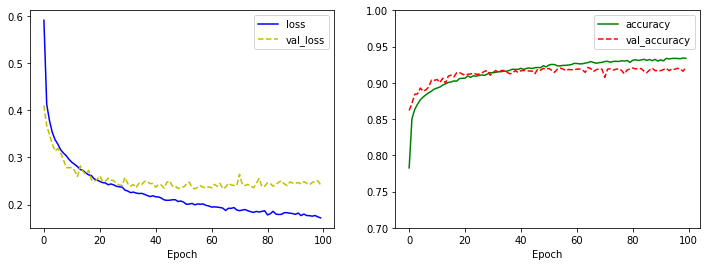

313/313 [==============================] - 3s 11ms/step - loss: 0.2467 - accuracy: 0.9144


[0.2467154562473297, 0.9143999814987183]

In [7]:
graph()
model.evaluate(test_images, test_labels)

## Callbacks 

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

checkpoint_path = 'check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(patience=20, verbose=1)


history = model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=500,
         validation_split=0.2,
         callbacks=[es,cp])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

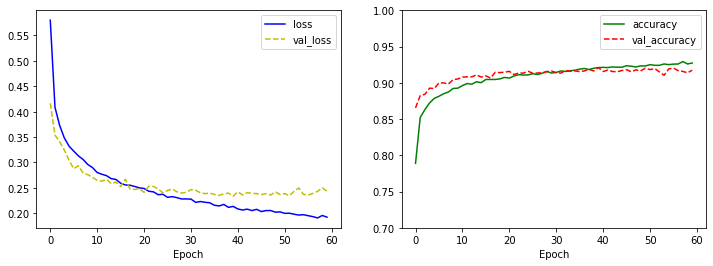

313/313 [==============================] - 8s 26ms/step - loss: 0.3207 - accuracy: 0.9010


[0.32066819071769714, 0.9010000228881836]

In [12]:
graph()
model.evaluate(test_images, test_labels)

## Batchnormalize

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=100,
         validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                      

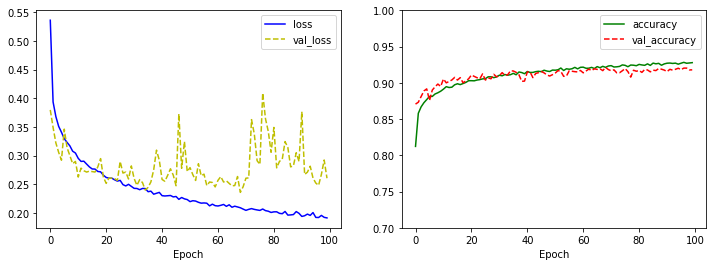

313/313 [==============================] - 4s 14ms/step - loss: 0.2754 - accuracy: 0.9168


[0.27535220980644226, 0.9168000221252441]

In [14]:
graph()
model.evaluate(test_images, test_labels)

## Separable Conv


In [ ]:
model = models.Sequential()

model.add(layers.SeparableConv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=100,
         validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 28, 28, 64)       132       
 Conv2D)                                                         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 7, 7, 64)          0         
                                                      

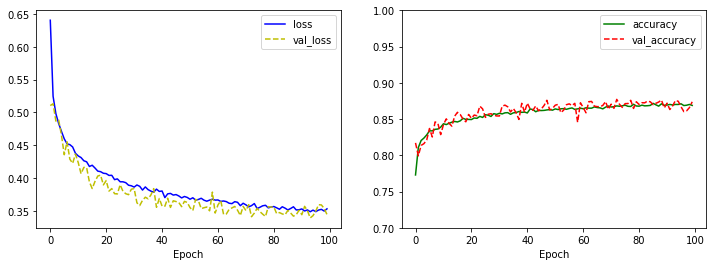

313/313 [==============================] - 4s 11ms/step - loss: 0.3548 - accuracy: 0.8706


[0.354821115732193, 0.8705999851226807]

In [16]:
graph()
model.evaluate(test_images, test_labels)